In [8]:
from default import PROJECT_HOME
%cd -q {PROJECT_HOME}

import matplotlib.pyplot as plt

from copy import deepcopy

from dataset.generator import SeismicTwoStoriesTrussGenerator
from dataset.structural.analysis import LinearAnalysis
from dataset.structural.structure import SeismicStoriesTruss
from display import display_structure

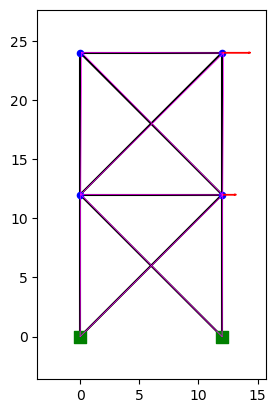

In [7]:
params = {
    'n_stories': 2,
    'n_spans': 1,
    'height': 12.0,
    'width': 12.0,
}

for i in range(params['n_stories'] * (params['n_spans'] * 4 + 1)):
    params[f"A_{i}"] = .4
    params[f"E_{i}"] = 30.e9

params["P"] = 2000e3

struct = SeismicStoriesTruss()
struct.generate_model(params)
LinearAnalysis().run_analysis()

display_structure(def_scale=10)

In [ ]:
total_size = 50_000
remain = total_size
base_config = {
    'n_sample': -1,
    'parameters': {
        '__young__': {'distribution': 'uniform', 'low': 20e9, 'high': 40e9}
    }
}


def plot(g):
    fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharex=True, sharey=True)
    for i, r in enumerate(g):
        display_structure(ax=axs[i // 3, i % 3], def_scale=20)
        if i >= 5: break


# Config 1
config = deepcopy(base_config)
config['n_sample'] = 2 * total_size // 14
remain -= 2 * total_size // 14
config['parameters']['height'] = {'distribution': 'uniform', 'low': 2, 'high': 4}
config['parameters']['width'] = {'distribution': 'uniform', 'low': 2, 'high': 4}
config['parameters']['P'] = {'distribution': 'uniform', 'low': 0, 'high': 500e3}
config['parameters']['__area__'] = {'distribution': 'uniform', 'low': 0.01, 'high': 0.04}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
#g.save(path, append=False)

# Config 2
config = deepcopy(base_config)
config['n_sample'] = 4 * total_size // 14
remain -= 4 * total_size // 14
config['parameters']['height'] = {'distribution': 'uniform', 'low': 4, 'high': 8}
config['parameters']['width'] = {'distribution': 'uniform', 'low': 4, 'high': 8}
config['parameters']['P'] = {'distribution': 'uniform', 'low': 0, 'high': 1000e3}
config['parameters']['__area__'] = {'distribution': 'uniform', 'low': 0.04, 'high': 0.2}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
#g.save(path, append=True)

# Config 3
config = deepcopy(base_config)
config['n_sample'] = 8 * total_size // 14
remain -= 8 * total_size // 14
config['n_sample'] += remain
config['parameters']['height'] = {'distribution': 'uniform', 'low': 8, 'high': 16}
config['parameters']['width'] = {'distribution': 'uniform', 'low': 8, 'high': 16}
config['parameters']['P'] = {'distribution': 'uniform', 'low': 0, 'high': 2000e3}
config['parameters']['__area__'] = {'distribution': 'uniform', 'low': 0.1, 'high': 0.04}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
#g.save(path, append=True)
